In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
import shutil

In [2]:
data = pd.read_csv('/content/drive/MyDrive/pokemon.csv')

In [3]:
data.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    809 non-null    object
 1   Type1   809 non-null    object
 2   Type2   405 non-null    object
dtypes: object(3)
memory usage: 19.1+ KB


In [5]:
!unzip -q /content/drive/MyDrive/images.zip

In [6]:
source = '/content/images'
img = 'charizard.png'
name = img.split('.')[0]

In [7]:
type1 = data[data['Name']==name].iloc[:,1].values[0]

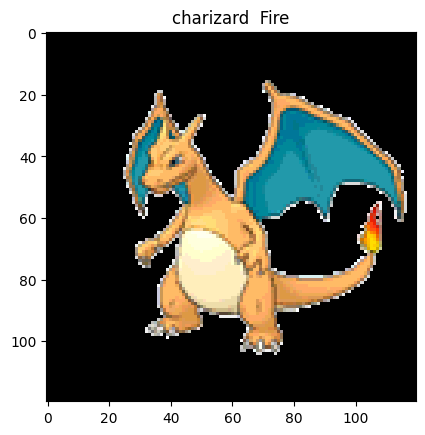

In [8]:
image = cv2.imread(os.path.join(source ,img))
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
title = f'{name}  {type1}'
plt.title(title)
plt.imshow(image)

In [9]:
source = '/content/images/'
img = 'arceus.png'
name = img.split('.')[0]

In [10]:
type1 = data[data['Name']==name].iloc[:,1].values[0]

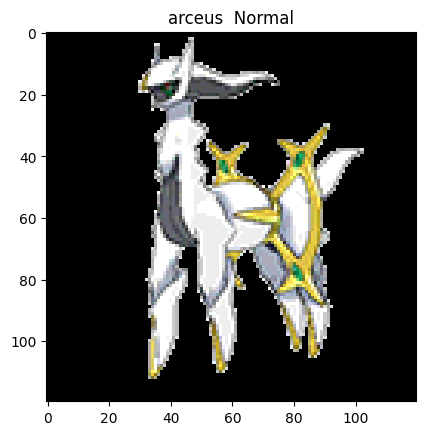

In [11]:
image = cv2.imread(os.path.join(source ,img))
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
title = f'{name}  {type1}'
plt.title(title)
plt.imshow(image)

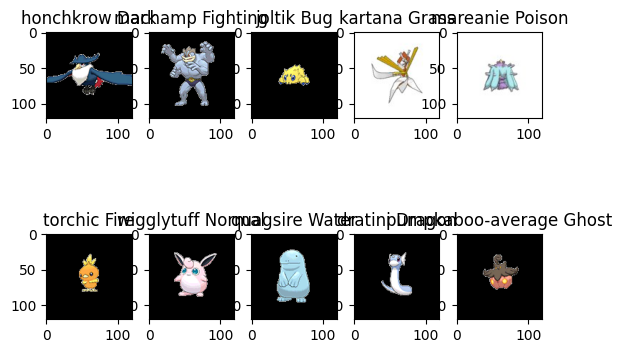

In [12]:
name = np.random.choice(os.listdir(source),10,replace = False)
for idx,i in enumerate(name):
  image = cv2.imread(os.path.join(source,i))
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  name = i.split('.')[0]
  type1 = data[data['Name']==name].iloc[:,1].values[0]
  title = f'{name} {type1}'
  plt.subplot(2,5,idx+1)
  plt.title(title)
  plt.imshow(image)

In [13]:
d = ['Water','Grass','Fire']
os.mkdir('/content/image')

In [14]:
for i in d:
  path = os.path.join('/content/image',i)
  os.mkdir(path)

In [15]:
dest = '/content/image/'

In [16]:
len(os.listdir(source))

809

In [17]:
for i in d:
  name = data[data['Type1']==i].Name.values
  for j in name:
    for k in os.listdir(source):
      if j in k:
        shutil.move(os.path.join(source,k),os.path.join(dest,i))

In [18]:
for i in d:
  print(i,len(os.listdir(os.path.join(dest,i))))

Water 114
Grass 78
Fire 53


In [19]:
!rm -rf images

In [20]:
os.listdir(os.path.join(dest,'Fire'))[0]

'slugma.png'

(120, 120, 3)

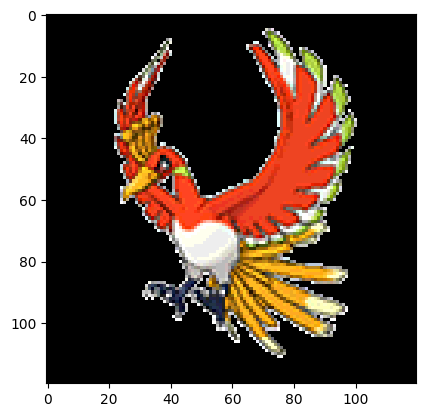

In [21]:
image = cv2.imread(os.path.join(dest,'Fire/ho-oh.png'))
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
image.shape

In [22]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255,
                                                      rotation_range=30,
                                                      width_shift_range=0.2,
                                                      height_shift_range=0.2,
                                                      horizontal_flip = True,
                                                      vertical_flip = True,
                                                      validation_split = 0.1)

In [23]:
train = idg.flow_from_directory(dest,(120,120),batch_size = 32,subset = 'training')

Found 222 images belonging to 3 classes.


In [24]:
val = idg.flow_from_directory(dest,(120,120),batch_size = 32,subset = 'validation')

Found 23 images belonging to 3 classes.


In [29]:
input = tf.keras.layers.Input((120,120,3),name = 'Input Layer')

#Convolutional layers
conv1 = tf.keras.layers.Conv2D(16,(3,3),strides = (1,1),
                               padding = 'valid',activation = 'relu',name = 'Conv_Layer_1')(input)

pool1 = tf.keras.layers.MaxPooling2D((2,2),strides = (2,2),padding = 'valid',
                                     name = 'Pool_Layer_1')(conv1)

conv2 = tf.keras.layers.Conv2D(32,(3,3),strides = (1,1),
                               padding = 'valid',activation = 'relu',name = 'Conv_Layer_2')(pool1)

pool2 = tf.keras.layers.MaxPooling2D((2,2),strides = (2,2),padding = 'valid',
                                     name = 'Pool_Layer_2')(conv2)

conv3 = tf.keras.layers.Conv2D(64,(3,3),strides = (1,1),
                               padding = 'valid',activation = 'relu',name = 'Conv_Layer_3')(pool2)

norm = tf.keras.layers.BatchNormalization()(conv3)

pool3 = tf.keras.layers.MaxPooling2D((2,2),strides = (2,2),padding = 'valid',
                                     name = 'Pool_Layer_3')(norm)

flatten = tf.keras.layers.Flatten(name = 'Flat_Layer')(pool3)
hidden1 = tf.keras.layers.Dense(16,activation = 'relu',name = 'Hidden_1')(flatten)
#dropout = tf.keras.layers.Dropout(0.3)(hidden1)
hidden2 = tf.keras.layers.Dense(32,activation = 'relu', name = 'Hidden_2')(hidden1)

output = tf.keras.layers.Dense(3, activation = 'softmax',name = 'Output')(hidden2)

model = tf.keras.models.Model(inputs = [input], outputs = [output])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Layer (InputLayer)    [(None, 120, 120, 3)]     0         
                                                                 
 Conv_Layer_1 (Conv2D)       (None, 118, 118, 16)      448       
                                                                 
 Pool_Layer_1 (MaxPooling2D  (None, 59, 59, 16)        0         
 )                                                               
                                                                 
 Conv_Layer_2 (Conv2D)       (None, 57, 57, 32)        4640      
                                                                 
 Pool_Layer_2 (MaxPooling2D  (None, 28, 28, 32)        0         
 )                                                               
                                                                 
 Conv_Layer_3 (Conv2D)       (None, 26, 26, 64)        1849

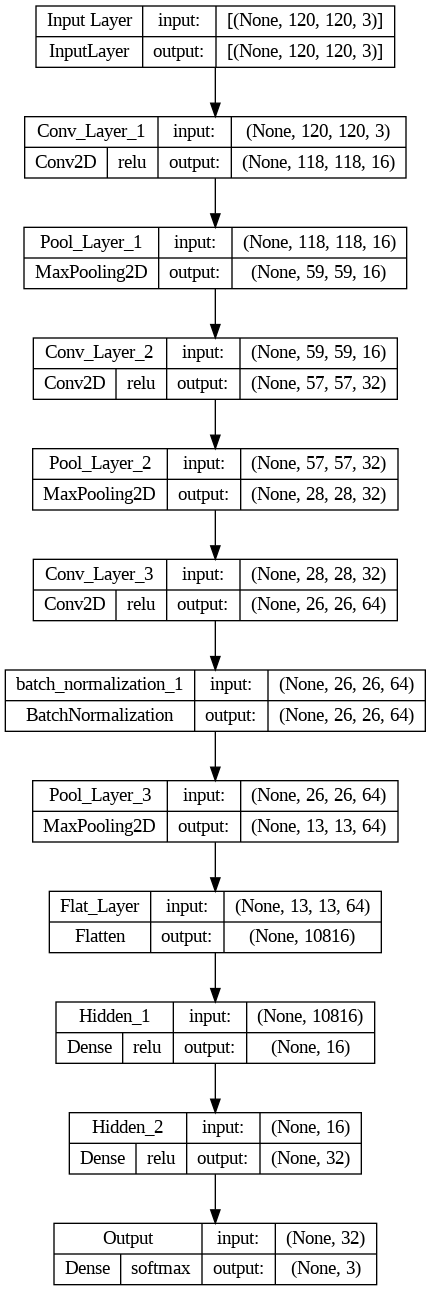

In [30]:
tf.keras.utils.plot_model(model,show_shapes = True,
                          show_layer_names = True,
                          show_layer_activations=True)

In [31]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

In [32]:
model.fit(train,batch_size = 32,
          epochs = 20,
          validation_data=val)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7/7 [==============================] - 5s 525ms/step - loss: 1.1242 - accuracy: 0.3784 - val_loss: 1.1021 - val_accuracy: 0.2174
Epoch 2/20
7/7 [==============================] - 6s 746ms/step - loss: 1.0743 - accuracy: 0.4099 - val_loss: 1.0916 - val_accuracy: 0.3043
Epoch 3/20
7/7 [==============================] - 4s 506ms/step - loss: 0.9766 - accuracy: 0.5000 - val_loss: 1.0824 - val_accuracy: 0.3913
Epoch 4/20
7/7 [==============================] - 4s 490ms/step - loss: 0.8687 - accuracy: 0.5766 - val_loss: 1.0604 - val_accuracy: 0.6087
Epoch 5/20
7/7 [==============================] - 5s 745ms/step - loss: 0.8476 - accuracy: 0.6261 - val_loss: 1.0835 - val_accuracy: 0.4348
Epoch 6/20
7/7 [==============================] - 4s 503ms/step - loss: 0.8451 - accuracy: 0.5946 - val_loss: 1.0781 - val_accuracy: 0.3913
Epoch 7/20
7/7 [==============================] - 4s 506ms/step - loss: 0.7624 - accuracy: 0.6757 - val_loss: 1.0328 - val_accuracy: 0.5652
Epoch 8/20
7/7 [===============

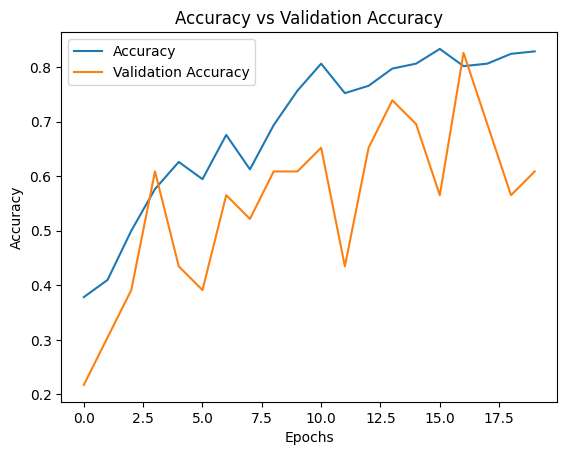

In [34]:
plt.plot(model.history.history['accuracy'],label = 'Accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [35]:
!wget https://i.pinimg.com/originals/99/f4/7c/99f47c320d049982eafaca508cb9da29.jpg

--2024-02-17 08:42:54--  https://i.pinimg.com/originals/99/f4/7c/99f47c320d049982eafaca508cb9da29.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.212.248.134, 23.212.248.140, 2600:1408:c400:11::17cd:6b5a, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.212.248.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73194 (71K) [image/jpeg]
Saving to: ‘99f47c320d049982eafaca508cb9da29.jpg’

99f47c320d049982eaf 100%[===================>]  71.48K  --.-KB/s    in 0.03s   

2024-02-17 08:42:55 (2.40 MB/s) - ‘99f47c320d049982eafaca508cb9da29.jpg’ saved [73194/73194]



In [37]:
def img_pred(path):
  image = cv2.imread(path)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  img = image/255.0
  img = cv2.resize(img,(120,120))
  img = np.expand_dims(img,axis = 0)
  plt.imshow(image)
  df = model.predict(img)[0]
  if df[0]>df[1] and df[0]>df[2]:
    plt.title('Fire')
  elif df[1]>df[0] and df[1]>df[2]:
    plt.title('Grass')
  elif df[2]>df[0] and df[2]>df[1]:
    plt.title('Water')

1/1 [==============================] - 0s 230ms/step


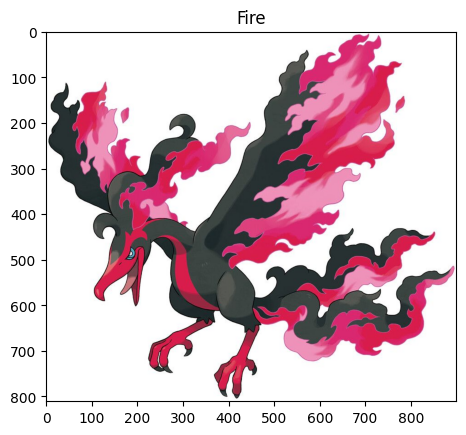

In [38]:
img_pred('/content/99f47c320d049982eafaca508cb9da29.jpg')

In [39]:
!wget https://facts.net/wp-content/uploads/2023/07/15-facts-about-incineroar-1689481320.jpg

--2024-02-17 08:43:14--  https://facts.net/wp-content/uploads/2023/07/15-facts-about-incineroar-1689481320.jpg
Resolving facts.net (facts.net)... 108.157.162.21, 108.157.162.121, 108.157.162.100, ...
Connecting to facts.net (facts.net)|108.157.162.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156996 (153K) [image/jpeg]
Saving to: ‘15-facts-about-incineroar-1689481320.jpg’

15-facts-about-inci 100%[===================>] 153.32K  --.-KB/s    in 0.05s   

2024-02-17 08:43:14 (3.19 MB/s) - ‘15-facts-about-incineroar-1689481320.jpg’ saved [156996/156996]



1/1 [==============================] - 0s 24ms/step


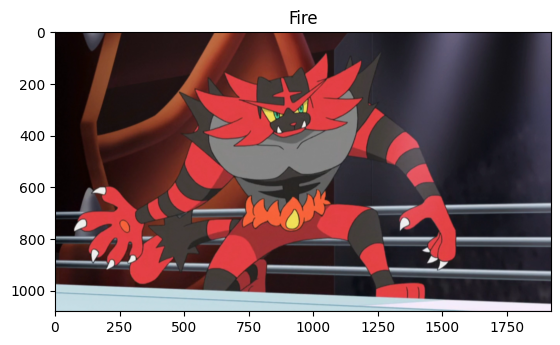

In [40]:
img_pred('/content/15-facts-about-incineroar-1689481320.jpg')

In [42]:
!wget https://assets.pokemon.com/assets/cms2/img/pokedex/full/721.png

--2024-02-17 08:44:46--  https://assets.pokemon.com/assets/cms2/img/pokedex/full/721.png
Resolving assets.pokemon.com (assets.pokemon.com)... 65.8.248.85, 65.8.248.123, 65.8.248.22, ...
Connecting to assets.pokemon.com (assets.pokemon.com)|65.8.248.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176275 (172K) [image/png]
Saving to: ‘721.png’

721.png             100%[===================>] 172.14K  --.-KB/s    in 0.05s   

2024-02-17 08:44:46 (3.48 MB/s) - ‘721.png’ saved [176275/176275]



1/1 [==============================] - 0s 31ms/step


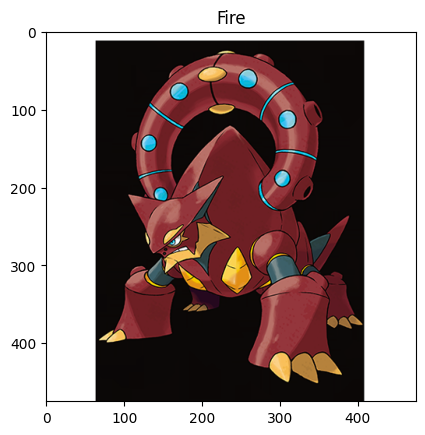

In [43]:
img_pred('/content/721.png')